# EXPLORATORY DATA ANALYSIS (EDA): SPORTS CAR PRICES

Exploratory data analysis (EDA) is a statistical term which simply refers to an investigation of a dataset to ascertain its statistical characteristics, trends, patterns, relationships, and to check assumptions. The approach is an initial analysis which forms a major part of the Data analysis process where statistical graphs and other forms of visualizations and summary statistics are made use of to gain insight of the dataset, and to identify anomalies within the dataset.

In [25]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)
import warnings
warnings.simplefilter("ignore")

In [26]:
# Load the dataset 

df=pd.read_excel("C:/Users/CYRIL/Desktop/leslie/Data_science/Data_analytics/Google/data_set/Sport_Cars_Prices.xlsx")

In [27]:
#Display the first 5 rows of the data

df.head()

,Car_Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3.0,379,331,4.0,101200
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,274390
2,Ferrari,488 GTB,2022,3.9,661,561,3.0,333750
3,Audi,R8,2022,5.2,562,406,3.2,142700
4,McLaren,720S,2021,4.0,710,568,2.7,298000


In [28]:
# The last 5 rows of the data

df.tail()

,Car_Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
946,Aston Martin,Vantage,2021,4.0,503,505,3.6,146000
947,Bugatti,Chiron,2021,8.0,1479,1180,2.4,3000000
948,Koenigsegg,Jesko,2022,5.0,1280,1106,2.5,3000000
949,McLaren,Senna,2021,4.0,789,590,2.7,1000000
950,Pagani,Huayra,2021,6.0,764,738,3.0,2600000


In [29]:
# Display all the columns

df.columns

Index(['Car_Make', 'Car Model', 'Year', 'Engine Size (L)', 'Horsepower',
       'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)'],
      dtype='object')

Car Make : Refers to the brand of the sports car

Car Model :Refers to the name of a car product and sometimes a range of products of a particular brand of car.

Year: The year the car was released for purchase

Engine size:It is the volume of fuel and air that can be pushed through a car's cylinders and is measured in cubic centimetres (cc) but are normally specified in litres, which is rounded up to the nearest tenth of a litre.

Horsepower (hp):It is the metric used to indicate the power produced by a car's engine. The higher the number, the more power is sent to the wheels and as a result, the faster the car.

Torque (lb-ft):It is a  measurement of a car's ability to do work. So, the more torque, the greater amount of power an engine can produce.

0-60 MPH Time (seconds): Refers to the time it takes for a car to reach speeds of 60 miles per hour.

Price (in USD): The price of the car at the time of release in US dollars.

In [30]:
# Check the shape of the data

df.shape

(951, 8)

* The dataset is made up of 951 rows and 8 columns

In [31]:
# A look at the data types of the various attributes

df.dtypes

Car_Make                    object
Car Model                   object
Year                         int64
Engine Size (L)            float64
Horsepower                   int64
Torque (lb-ft)               int64
0-60 MPH Time (seconds)    float64
Price (in USD)               int64
dtype: object

In [32]:
# checking for duplicate values in data

duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (285, 8)


In [33]:
# Drop the duplicates 

df = df.drop_duplicates()
df.head()

,Car_Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3.0,379,331,4.0,101200
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,274390
2,Ferrari,488 GTB,2022,3.9,661,561,3.0,333750
3,Audi,R8,2022,5.2,562,406,3.2,142700
4,McLaren,720S,2021,4.0,710,568,2.7,298000


In [34]:
# Count the number of rows after removing duplicates.

df.count()

Car_Make                   666
Car Model                  666
Year                       666
Engine Size (L)            666
Horsepower                 666
Torque (lb-ft)             666
0-60 MPH Time (seconds)    666
Price (in USD)             666
dtype: int64

In [35]:
# Find the null values

print(df.isnull().sum())

Car_Make                   0
Car Model                  0
Year                       0
Engine Size (L)            0
Horsepower                 0
Torque (lb-ft)             0
0-60 MPH Time (seconds)    0
Price (in USD)             0
dtype: int64


There are no columns with null values

In [36]:
# Statistical summary of the dataset

df=df.drop('Year',axis=1)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size (L),666.0,4.415015,1.444372,0.0,3.5,4.0,6.0,8.4
Horsepower,666.0,591.705706,426.612952,181.0,444.0,573.0,650.0,10000.0
Torque (lb-ft),666.0,517.720721,321.088881,151.0,384.0,479.0,590.0,7376.0
0-60 MPH Time (seconds),666.0,3.654655,0.730939,1.9,3.1,3.5,4.0,6.5
Price (in USD),666.0,335238.704204,711545.716774,25000.0,69225.0,114500.0,222004.0,5200000.0


###### Insights

* The average engine size is approximately 4.39L with a range of 8.4L, where the minimum engine size is 0.0L which couldn't have the case for any vehicle, and maximum engine size of 8.4L. The record of 0.0L could be attributed to data entry error, which could result in an issue of outliers. The standard deviation of approximately 1.40L being lesser in value to the average indicates that the data values are closer to the average engine size.

* The Horsepower(HP) of the cars averaged approximately 603.34Hp, with a standard deviation of ~382.18Hp which indicates the closeness of the data values to the average.

* The price of the cars ranges from $25,000.0-$5,200,000.0, with an average pricing of ~$342586.46.

* The average time it takes a car to reach 60 Miles per hour is ~3.59 seconds. 

In [37]:
# Separate Categorical and Numerical data for easy analysis

cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Car_Make', 'Car Model'], dtype='object')
Numerical Variables:
['Engine Size (L)', 'Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)']


## EDA Univariate Analysis¶

This involves analysing or exploring the data by considering each variable in the dataset separately.It looks at the range of values, as well as the central tendency of the values. It describes the pattern of response to the variable. It describes each variable on its own.Univariate analysis can be done for both Categorical and Numerical variables.Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

Engine Size (L)
Skew : 0.39


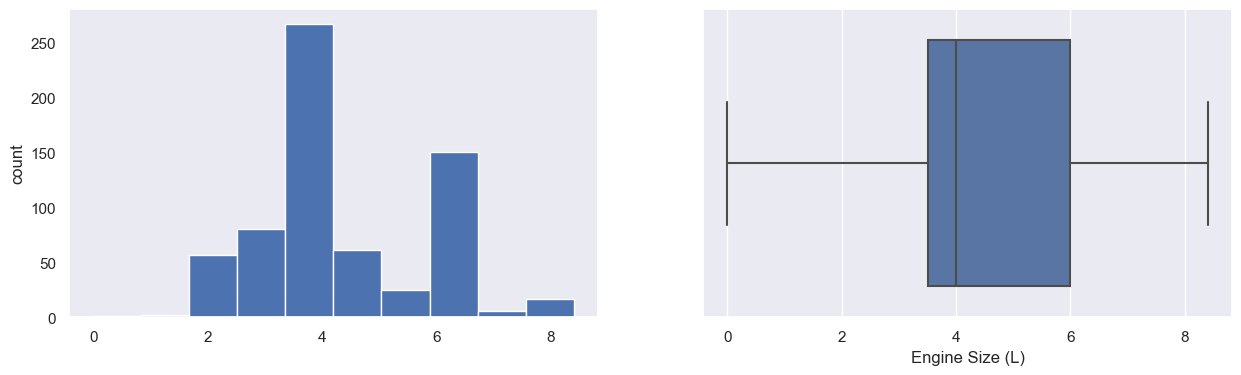

Horsepower
Skew : 16.45


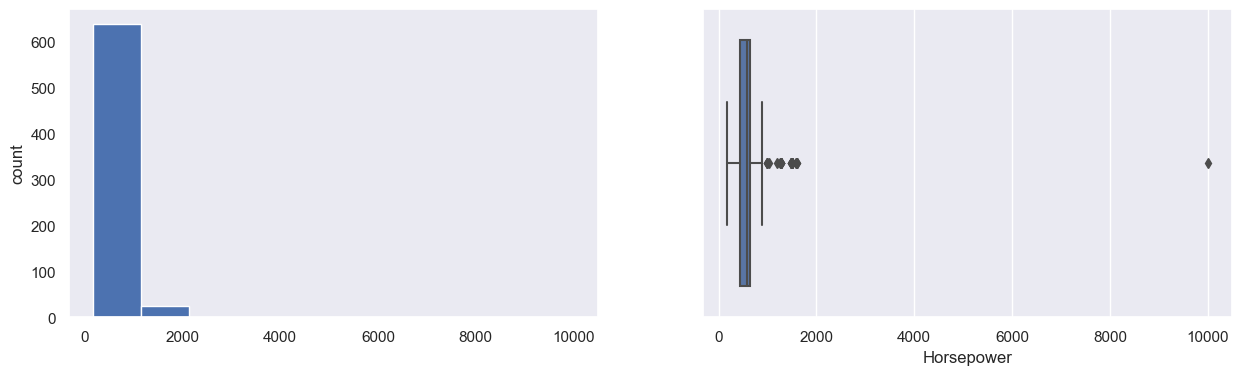

Torque (lb-ft)
Skew : 14.93


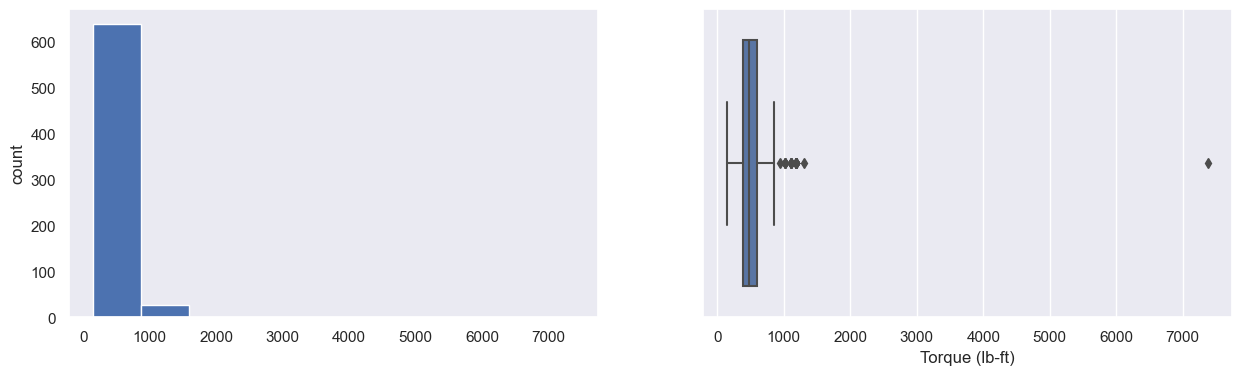

0-60 MPH Time (seconds)
Skew : 0.58


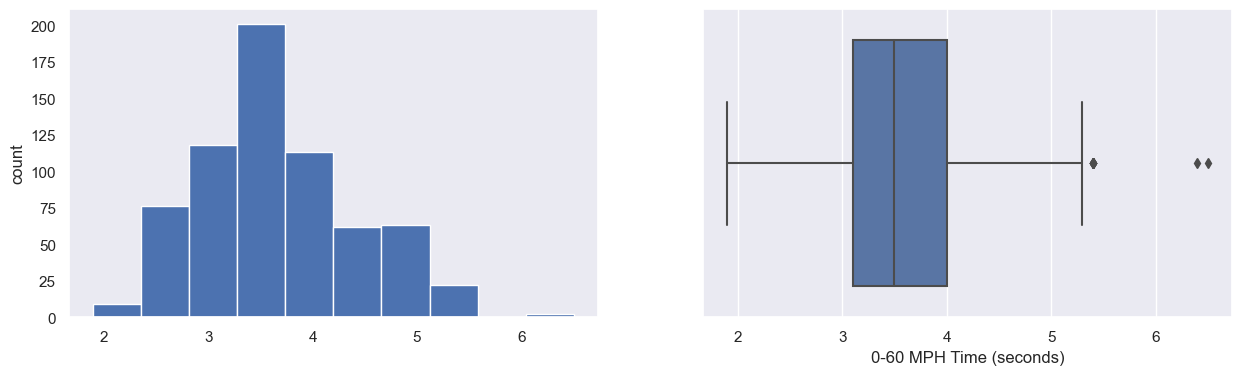

Price (in USD)
Skew : 3.84


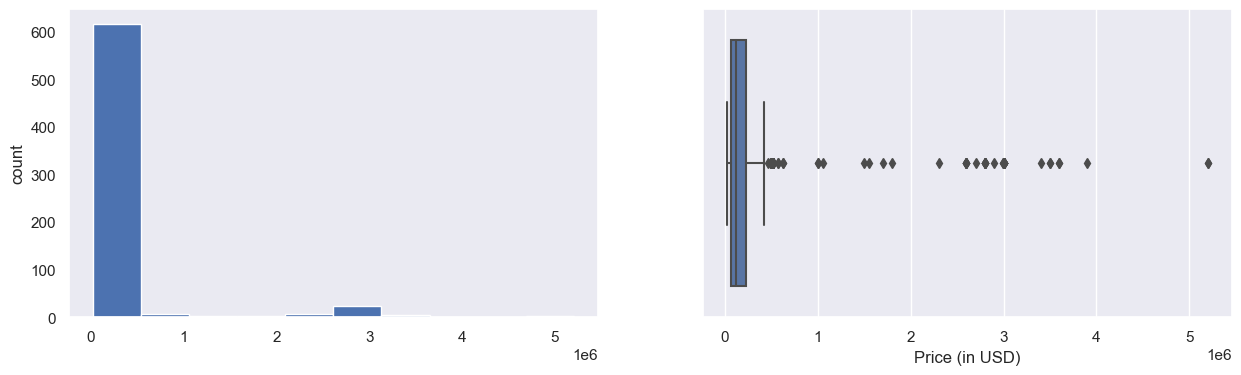

In [38]:
# Visualization of Numerical variables

for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

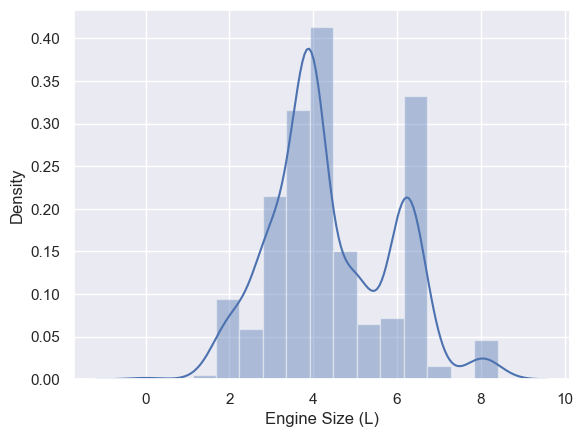

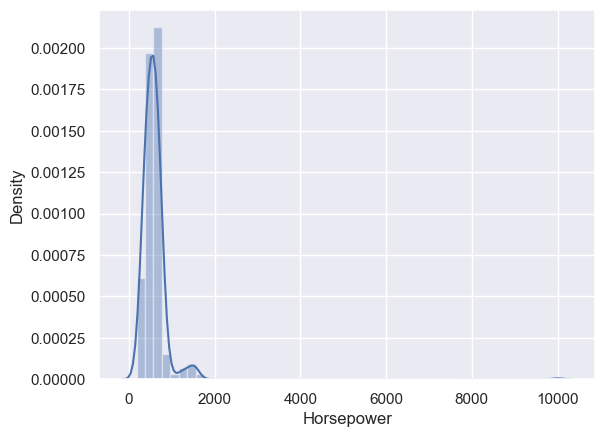

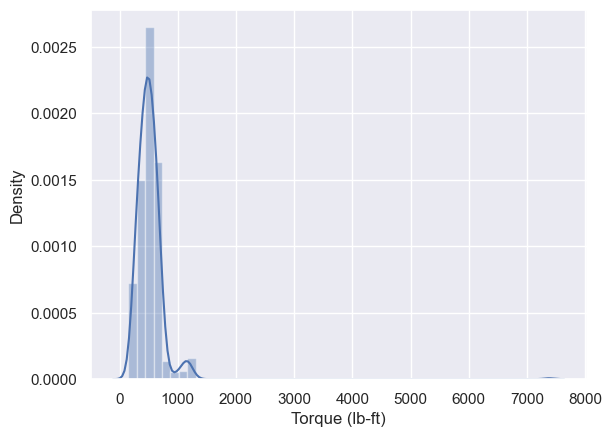

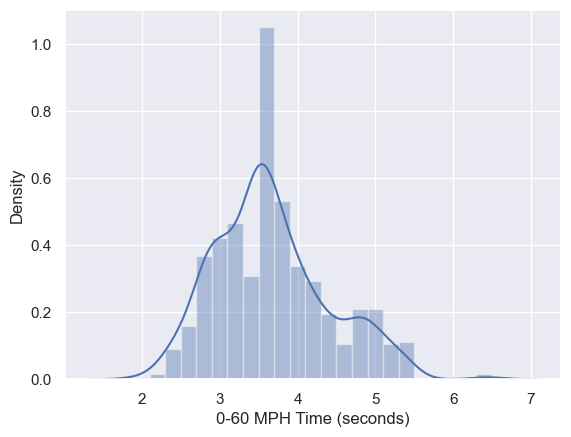

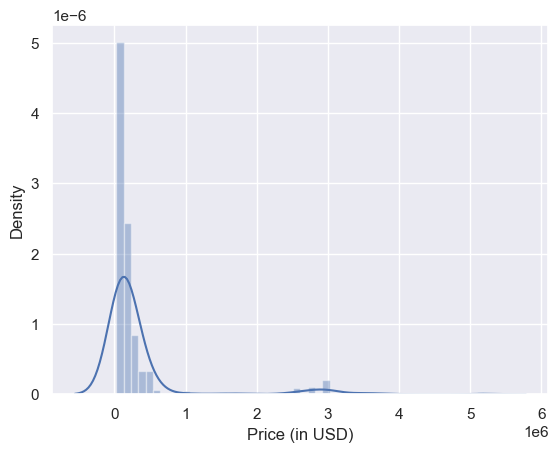

In [39]:
# Distribution plots

Columns = ['Engine Size (L)', 'Horsepower',
       'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)']
for i in Columns:
    plt.figure()
    sns.distplot(df[i])

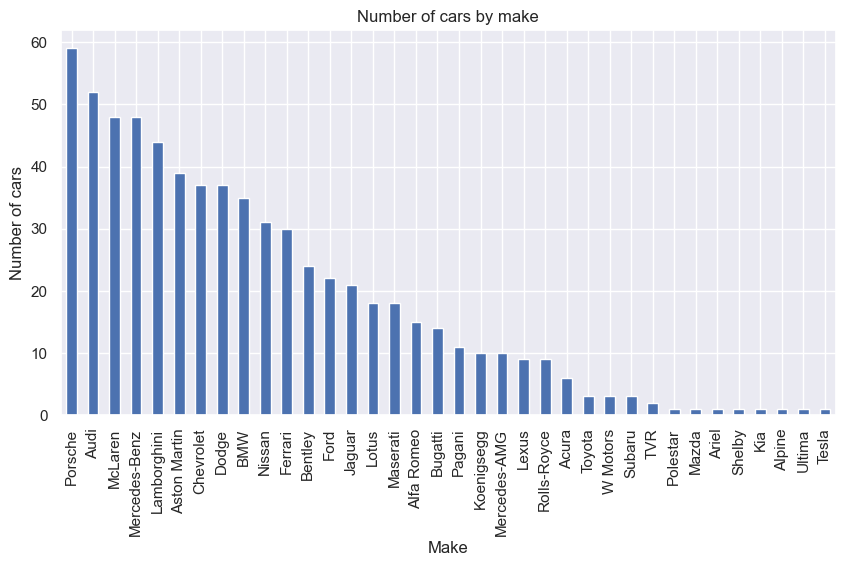

In [40]:
# Plotting a Barchart for number of cars per brand

df.Car_Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel("Number of cars")
plt.xlabel("Make");

In [41]:
# Checking the number of distinct count in the dataset

df['Car_Make'].value_counts()

Porsche          59
Audi             52
McLaren          48
Mercedes-Benz    48
Lamborghini      44
Aston Martin     39
Chevrolet        37
Dodge            37
BMW              35
Nissan           31
Ferrari          30
Bentley          24
Ford             22
Jaguar           21
Lotus            18
Maserati         18
Alfa Romeo       15
Bugatti          14
Pagani           11
Koenigsegg       10
Mercedes-AMG     10
Lexus             9
Rolls-Royce       9
Acura             6
Toyota            3
W Motors          3
Subaru            3
TVR               2
Polestar          1
Mazda             1
Ariel             1
Shelby            1
Kia               1
Alpine            1
Ultima            1
Tesla             1
Name: Car_Make, dtype: int64

Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical.

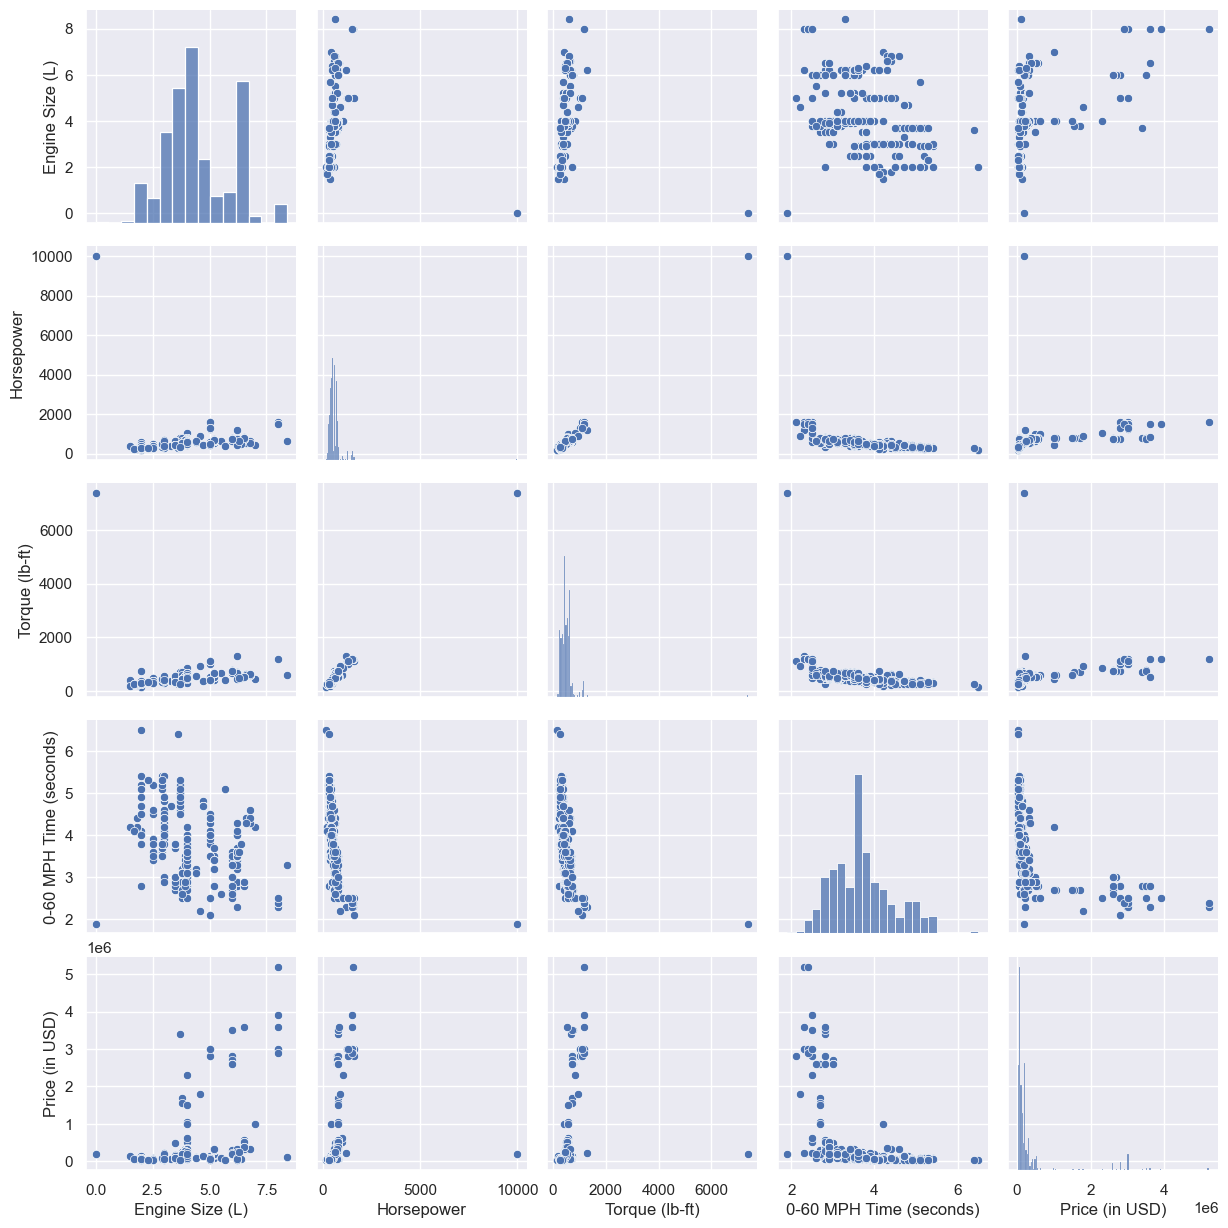

In [42]:
# Pairplot Visualization

sns.pairplot(df)

From the Pairplot visualisation; 

- The Engine size,Horsepower,and Torque all have a positive correlation to the price of the car.This means that, with an increment in size of these attributes or measures, the more expensive the car and vice-versa.

- There is a negative correlation between the 0-60 MPH Time,and the rest of the other measures. This implies that with an increment in value in 0-60 MPH Time, the other attributes decreases in value and vice-versa.

- Horsepower has a positive correlation with all the other measures except 0-60 MPH Time, which is negative.

,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
Engine Size (L),1.000000,0.224031,0.244044,-0.411392,0.388017
Horsepower,0.224031,1.000000,0.978253,-0.460553,0.390487
Torque (lb-ft),0.244044,0.978253,1.000000,-0.460497,0.388049
0-60 MPH Time (seconds),-0.411392,-0.460553,-0.460497,1.000000,-0.466662
Price (in USD),0.388017,0.390487,0.388049,-0.466662,1.000000


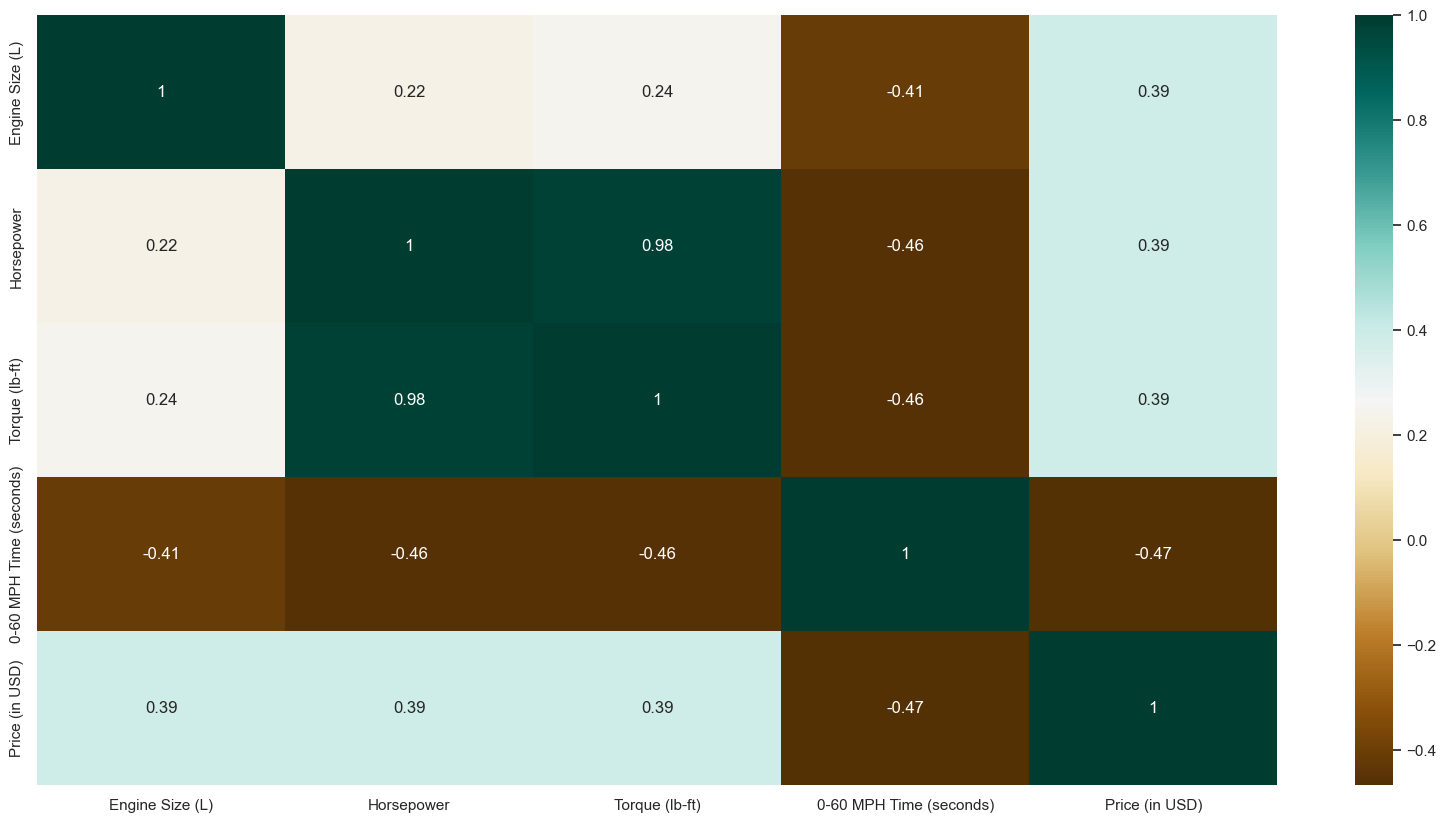

In [43]:
# Finding the relations between the variables.

plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

Interpretation

Engine Size:
* The correlation between the engine size and Horsepower of the car is positive and negligible of value 0.21, which means that an increment in the Engine size causes a marginal or negligible increase in the Horsepower and vice-versa.

* The same could be said about the Engine size and the Torque. Again, the correlation coefficient is positively negligible of 0.22. 

* The correlation coefficient between the Engine size and that of the time it takes for a car to reach speeds of 60 miles per hour (MPH) is negative moderate of -0.42. This implies that an increase in one of the variables would result in a moderate decrease in the other, and vice-versa. 

* The Engine size and price of the cars have a correlation coefficient of 0.38, which depicts a moderate positive one. This means that whenever the Engine size is increased, there is a moderate increase in the prices of the cars and vice-versa.

Horsepower:
* There is very strong positive correlation between the Horsepower and the Torque which is given by the value 0.98. This explains that,with an increase in the Horsepower, there is also an increase in the Torque and vice-versa. The Torque being the work rate of the car explains this clearly.

* The correlation coefficient of -0.45 between the Horsepower and the time it takes for a car to reach speed of 60 miles per hour (MPH) is a negatively moderate one, which explains that an increase in one, causes a decrease in the other, and vice-versa. 

* The price and the Horsepower have a moderate positive correlation of 0.36. 

Torque:
* There is a moderate negative correlation of -0.45 between the Torque and the time it takes for a car to reach speed of 60 miles per hour (MPH). This means an increase in one variable causes a decrease in the other.

* The price and Torque have a moderate positive correlation of 0.36

0-60 MPH Time (seconds):
* There is a moderate negative correlation of -0.46 between the time it takes for a car to reach speed of 60 miles per hour (MPH) and the price of the car. 
